In [17]:
!unzip Dataset.zip

Archive:  Dataset.zip
replace Section2-Chapter2/01kcPWA9K2BOxQeS5Rju.asm? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [45]:
#Extracting feature out of Text.
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

fileNames=[]
text=[]

fileDir="Section2-Chapter2"
for fileName in os.listdir(fileDir):
    if fileName.endswith(".asm"):
        with open(fileDir+"/"+fileName, encoding='utf-8', errors='ignore') as f:
            content=f.read()
        content.replace(",", " ")
        content.replace('"', " ")
        text.append(content)
        
        fileName = fileName.split('.')[0]
        fileNames.append(fileName)

        
vectorizer=CountVectorizer(stop_words='english',max_features=1000)
dtm=vectorizer.fit_transform(text)
df=pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
df['file_name']=fileNames


In [48]:
df.head(10)

,00,00000006,00400000,00401000,00419e3e,0041a340,00429525,00448791,0045abae,0050434f,...,xmm0,xmmword,xor,xprt,xref,xz,yapaxi,yaxpax,ygxj,file_name
0,8326,0,0,39,0,0,0,0,0,0,...,0,0,175,0,722,0,0,0,0,0W1RChtwZvj4Qy78GYUJ
1,13886,1,0,0,0,0,0,0,0,0,...,0,0,588,0,3218,27,0,0,0,0DqUX5rkg3IbMY6BLGCE
2,1962,0,17,0,0,0,0,0,0,0,...,0,0,8,0,191,0,0,0,0,13YpdP5vTLOazSQFRgJn
3,1969,0,17,0,0,0,0,0,0,0,...,0,0,10,0,181,0,0,0,0,12Jd4qpOzTtQC3E6PXDb
4,16023,3,0,46,0,0,1,191,0,0,...,0,0,282,0,2069,0,16,15,0,0XVbihU4clgRS9A6tsB2
5,1953,0,17,0,0,0,0,0,0,0,...,0,0,11,0,187,0,0,0,0,16eajI7F2vQKhwi9dM4O
6,121547,2,0,37,1,1,1,1,1,1,...,0,0,96,0,1059,0,2,30,0,0yjkG4BHeCbTimIslgr7
7,21166,32,0,0,0,0,0,0,0,0,...,0,0,740,0,5787,713,56,153,287,04EjIdbPV5e1XroFOpiN
8,14278,3,0,45,179,0,1,0,0,0,...,0,0,1895,0,1957,0,16,15,0,0xpa8zDNdEnK9gB1Wmer
9,9282,3,0,45,1,179,0,0,0,0,...,0,0,3258,0,1616,0,16,15,0,0XbS5KBuICayhs2p3NTU


In [68]:
#PCA using SVD to reduce the dimensions.
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer


reduced_svd=TruncatedSVD(2)
reduced_dtm=reduced_svd.fit_transform(dtm)
reduced_dtm=Normalizer(copy=False).fit_transform(reduced_dtm)

reduced_df=pd.DataFrame(reduced_svd.components_, index=["C1", "C2"],columns=vectorizer.get_feature_names())



In [69]:
reduced_df.head()

,00,00000006,00400000,00401000,00419e3e,0041a340,00429525,00448791,0045abae,0050434f,...,xchg,xmm0,xmmword,xor,xprt,xref,xz,yapaxi,yaxpax,ygxj
C1,0.028405,7.597591e-07,3.561214e-07,0.000012,4.443393e-07,3.113892e-07,4.625932e-07,5.037055e-07,4.920937e-07,0.000074,...,0.000015,4.100920e-07,0.000001,0.000109,1.577816e-07,0.000376,1.612821e-07,4.738671e-07,6.326905e-06,4.169921e-08
C2,-0.000596,3.151650e-06,2.040132e-05,0.000027,1.633409e-06,1.242182e-06,2.259794e-06,3.059241e-06,3.040174e-06,0.000036,...,0.000190,1.008807e-05,0.000015,0.001384,7.402019e-06,0.001875,8.588881e-06,1.752375e-06,-2.167514e-07,2.895118e-06


In [51]:
final_df=pd.DataFrame(reduced_dtm,columns=["F1","F2"])

In [53]:
final_df['']=fileNames

F1    30
F2    30
dtype: int64

In [39]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=3,random_state=0, batch_size=5, max_iter=10)

y_pred=kmeans.fit_predict(final_df)

In [40]:
y_pred

array([2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       2, 1, 1, 1, 2, 2, 2, 0], dtype=int32)

In [54]:
final_df['label']=y_pred
final_df['file_name']=fileNames

In [57]:
final_df.head(5)

,F1,F2,label,file_name
0,0.964057,0.265696,2,0W1RChtwZvj4Qy78GYUJ
1,0.924034,0.382309,2,0DqUX5rkg3IbMY6BLGCE
2,0.626107,0.779737,1,13YpdP5vTLOazSQFRgJn
3,0.624915,0.780693,1,12Jd4qpOzTtQC3E6PXDb
4,0.918391,0.395675,2,0XVbihU4clgRS9A6tsB2


Text(0, 0.5, 'F2')

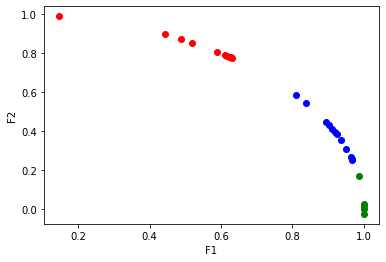

In [67]:
from matplotlib import pyplot as plt

df1=final_df[final_df['label']==0]
df2=final_df[final_df['label']==1]
df3=final_df[final_df['label']==2]


plt.scatter(df1.F1, df1.F2, color='green')
plt.scatter(df2.F1, df2.F2, color='red')
plt.scatter(df3.F1, df3.F2, color='blue')

plt.xlabel('F1')
plt.ylabel('F2')

